[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 177
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] "Age"
[1] "Age" "177"


[1] 177

Warning message:
"Removed 177 rows containing non-finite values (stat_density)."

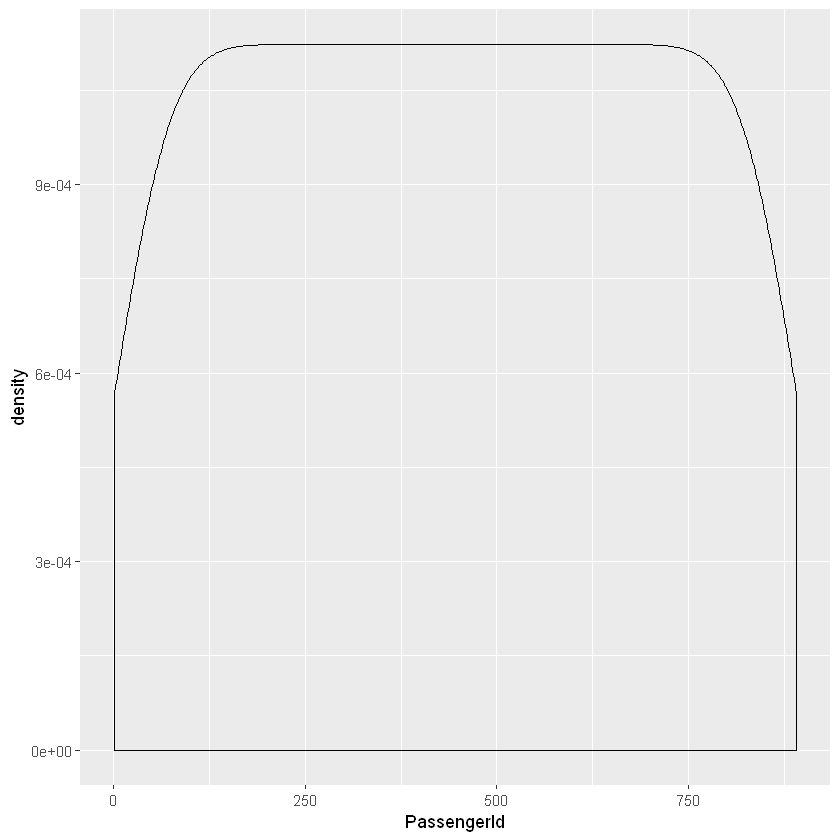

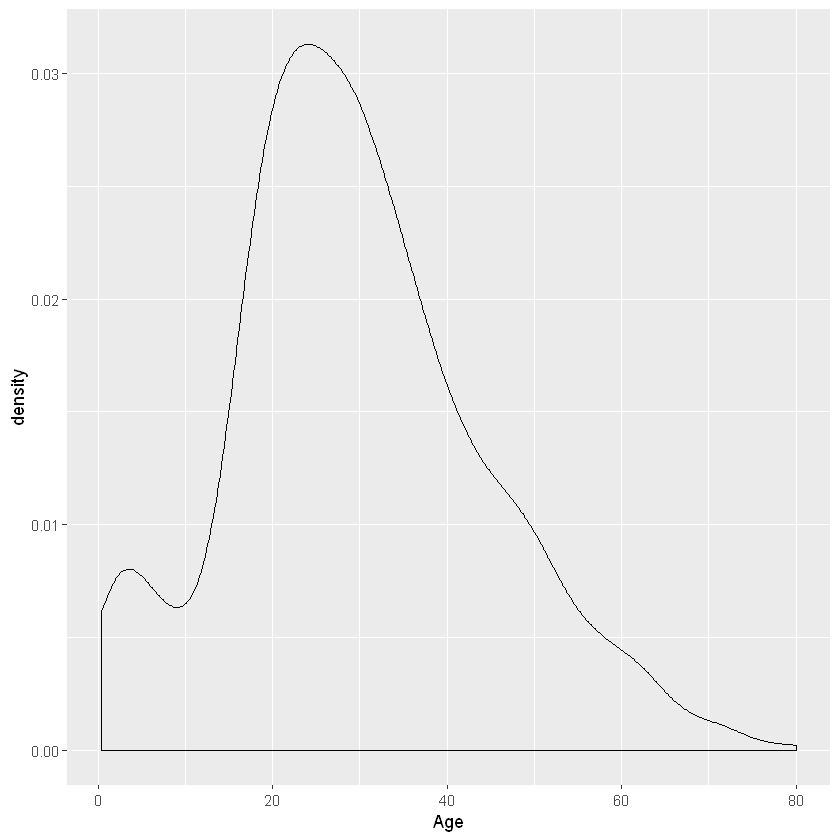

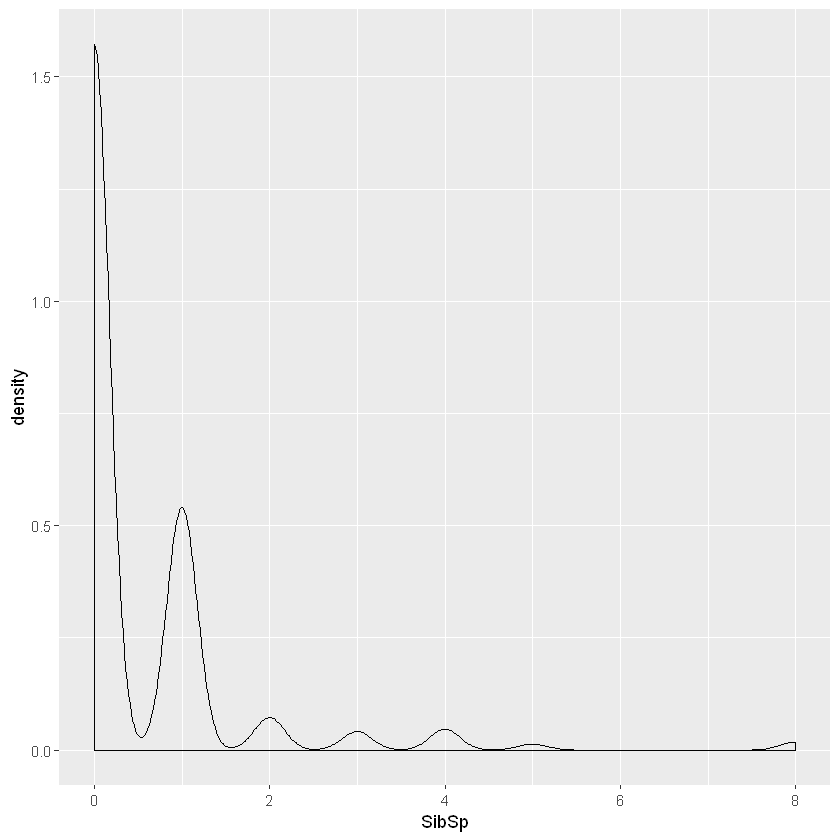

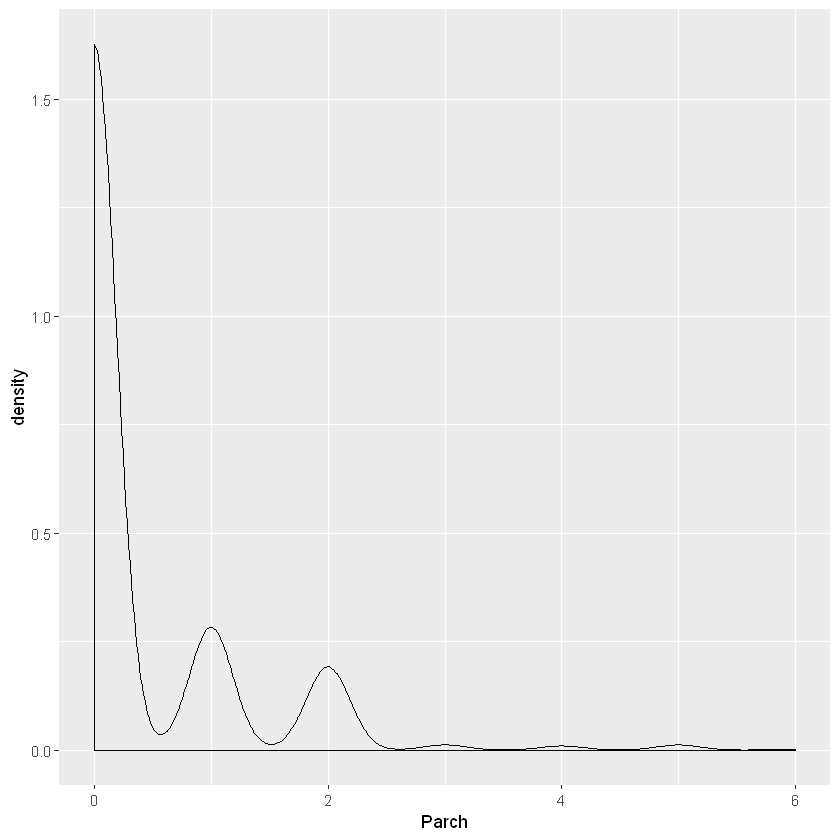

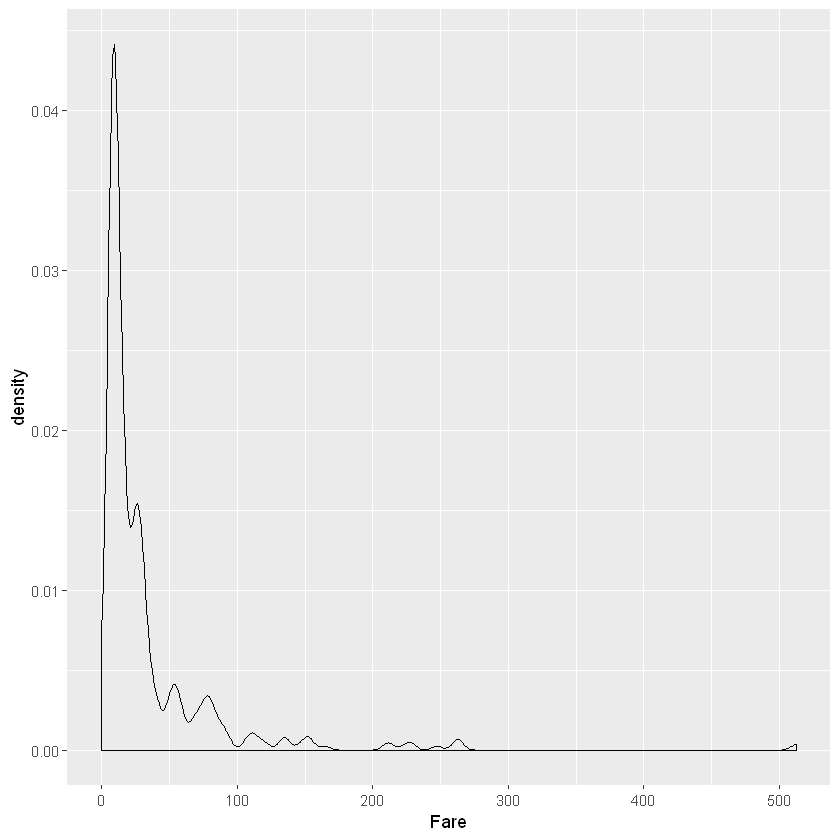

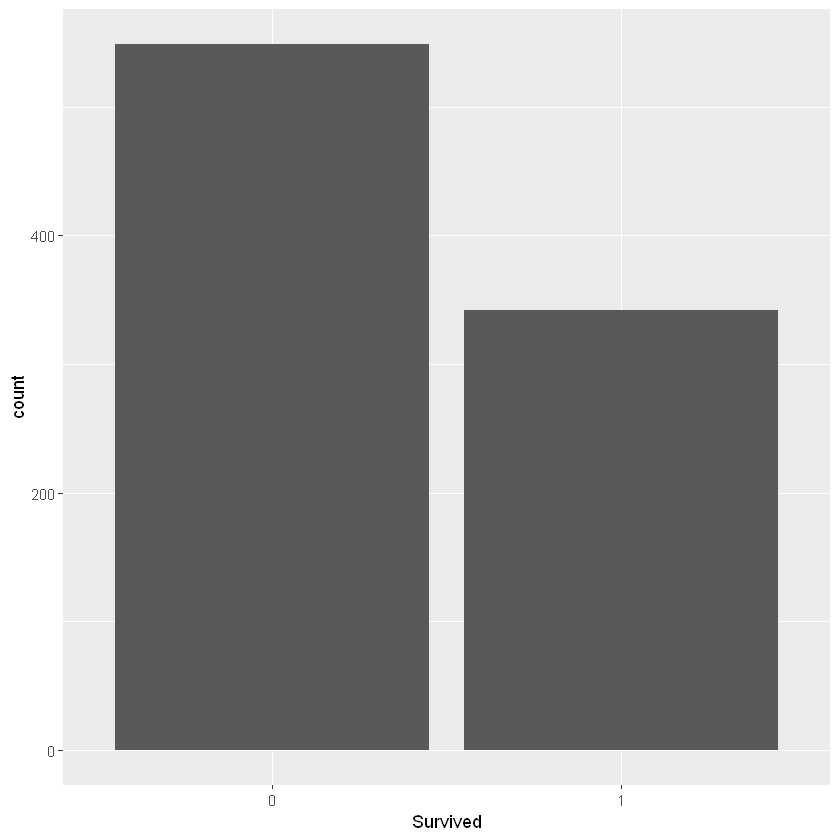

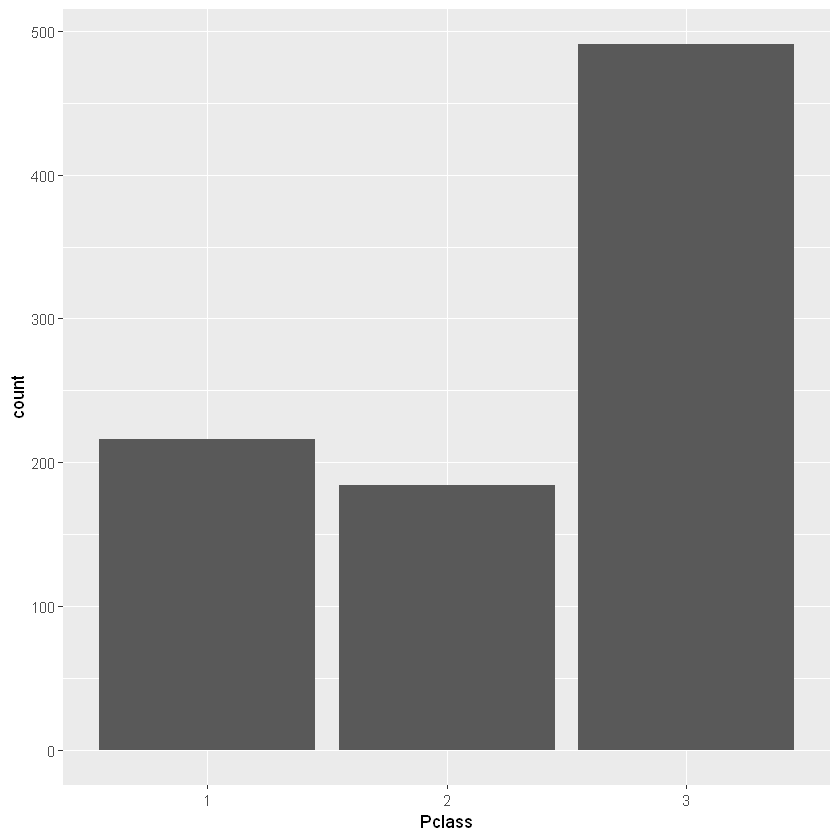

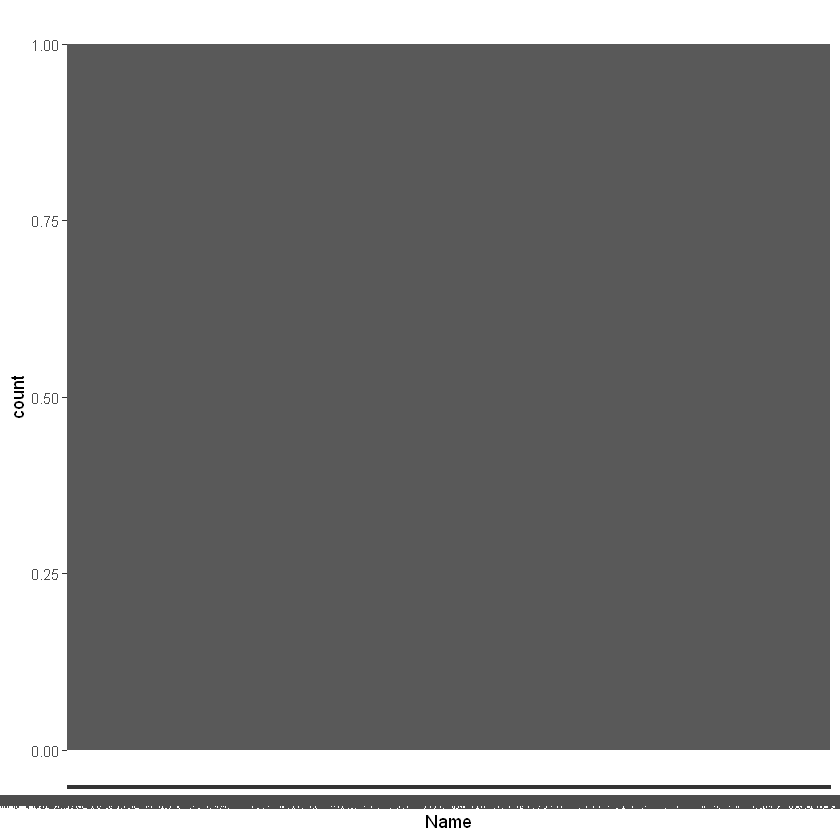

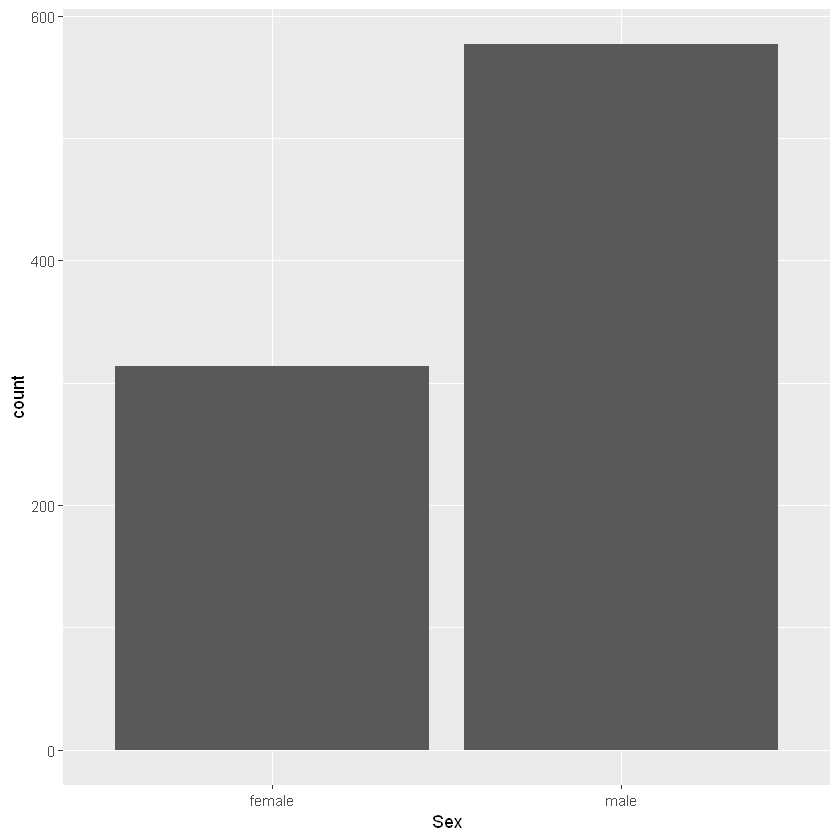

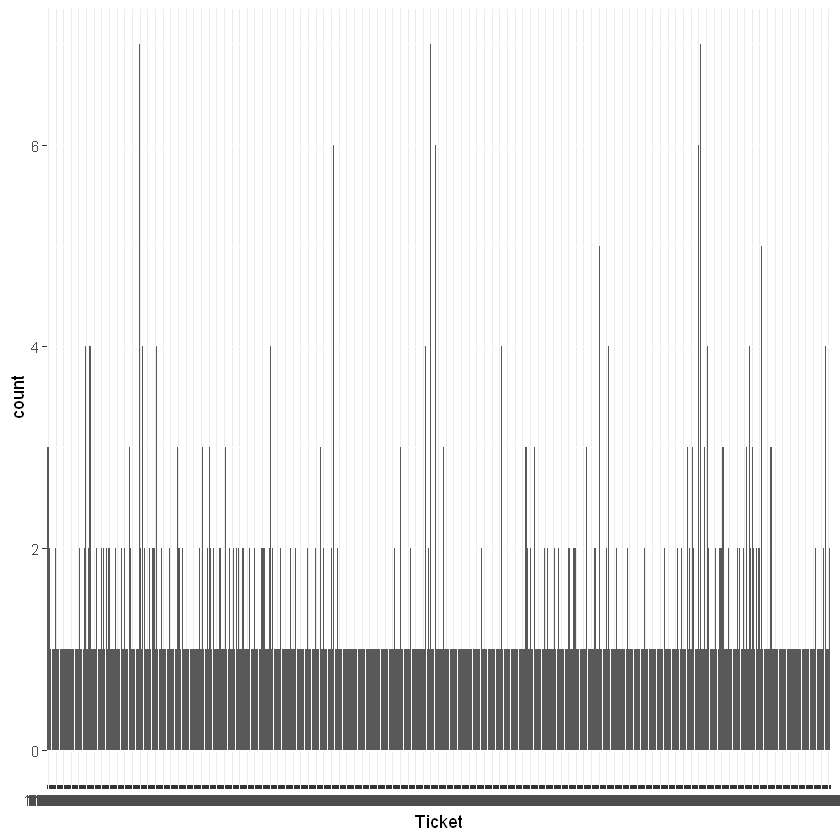

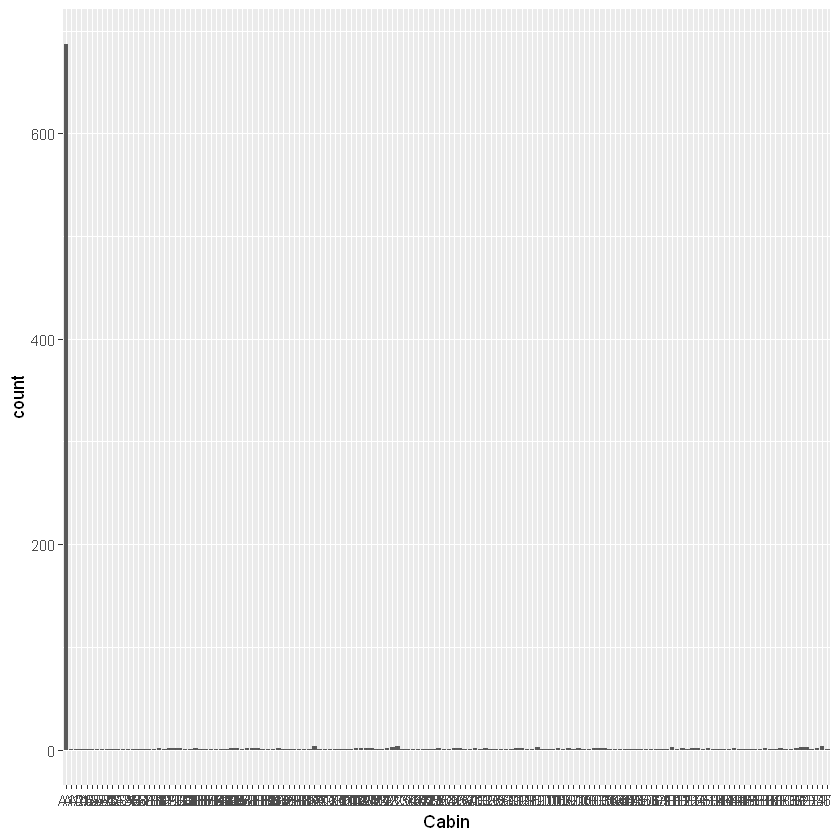

[1] "At least one of the columns is not categorical"
[1] "At least one of the columns is not categorical"
[1] "At least one column is not numeric"
[1] "At least one column is not numeric"


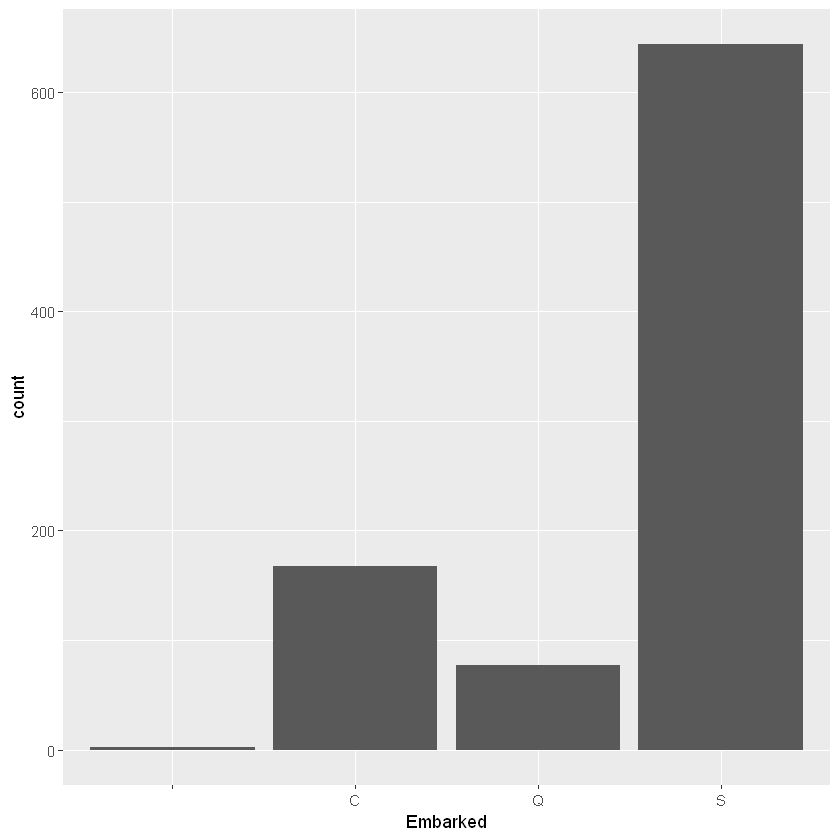

[1] "The input variable is not numeric"
[1] "The input variable is not numeric"


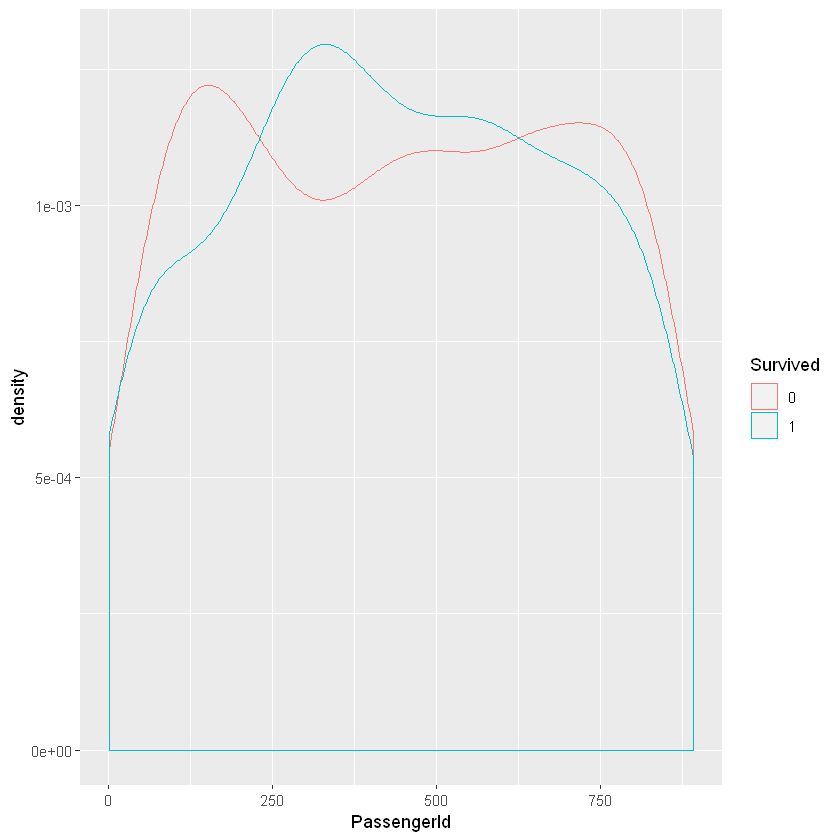

In [ ]:
RHW1=read.csv("C:/Users/student/Downloads/R/titanic.csv")
RHW1$Survived = factor(RHW1$Survived)
RHW1$Pclass = factor(RHW1$Pclass)
library(ggplot2)

#1.	Write a function that inputs a dataset (data frame) and outputs the number of missing values in each variables


missvar= function(data){
  for (i in 1:ncol(data)){
   num=sum(is.na(data[,i]))
  print(num)
   }
}
missvar(RHW1)

#2.	 Write a function that inputs a dataset and outputs the names of variables with missing values

missvar1= function(data){
  for (i in 1:ncol(data)){
    if (sum(is.na(data[,i]))>0){
      print(names(data[i]))
    }
  }
}

missvar1(RHW1)

#3.	Write a function that inputs a dataset and outputs 
 #   (1) the names of variables with missing values and 
  #  (2) the corresponding number of missing values in each variables

namevar= function(data){
  for (i in 1:ncol(data)){
    if (sum(is.na(data[,i]))>0){
      print(c(names(data[i]), sum(is.na(data[,i]))))
      
    }
  }
}
namevar(RHW1)


#4. Write a function that inputs a dataset and output a dataset with missing values handled as follows:
 #-	Missing values of numeric variables are replaced by the means of the non-missing values in the variables 
 #-	Missing values of categorical variables are replaced by the most frequent category in the variables

misshandled=function(data){
  for(i in 1:ncol(data)){
    if (is.numeric(data[,i])){
      data[,i][is.na(data[,i])]=mean(data[,i], na.rm=TRUE)
    } else{
      levels=unique(data[,i])
      data[,i][is.na(data[,i])]=lebels[which.max(tabulate(match(data[,i],levels)))]
    }
  }
  return(data)
}
sum(is.na(RHW1))


#6.	Write a function that inputs a dataset and output density curves of all numeric variables

densitycurve=function(data){
  for(i in 1:ncol(data)){
    if(is.numeric(data[,i])){
      print(ggplot(data)+geom_density(mapping=aes(x=data[,i]))+xlab(names(data[i])))
    }
  }
}
densitycurve(RHW1)

#7.	Write a function that inputs a dataset and output bar charts of all categorical variables

bar_chart=function(data){
  for (i in 1:ncol(data)){
    if(!is.numeric(data[,i])){
      print(ggplot(data)+geom_bar(mapping=aes(x=data[,i]))+xlab(names(data[i])))
    }
  }
}
bar_chart(RHW1)

#8.	Write a function that inputs a dataset and two number i, j and outputs bar charts of column i and column j.  If either i or j are not categorical variables, output a message saying so


bar_var=function(data, i, j){
  if(is.numeric(data[,i])| is.numeric(data[,j])){
    print("At least one of the columns is not categorical")
  } else{
    print(ggplot(data)+geom_bar(mapping=aes(x=data[,i], fill=data[,j]), position="dodge")+labs(x=names(data)[i], fill=names(data)[j]))
  }
}
bar_var(RHW1, 1,6)
bar_var(RHW1, 1, 2)

#9.	Write a function that inputs a dataset and two number i, j and outputs the scatter plot of column i and column j. If either i or j are not numeric variables, output a message saying so

scatter_var=function(data,i,j){
  if(!is.numeric(data[,i])| !is.numeric(data[,j])){
    print("At least one column is not numeric")
  } else {
    print(ggplot(data)+geom_point(mapping=aes(x=data[,i],y=data[,j]))+labs(x=names(data)[i],y=names(data)[j]))
  }
}
scatter_var(RHW1, 4,2)
scatter_var(RHW1,4,7)

#10.	Write a function that inputs a dataset and two number i, j and output the density curves of column i partitioning on categories of column j. If the two columns are not suitable for the graph, print out the message saying so. 

density_var=function(data,i,j){
  if(!is.numeric(data[,i])){
    print("The input variable is not numeric")
  } else if(is.numeric(data[,j])){
    print("The partitioning variable is not categorical")
  } else{
    print(ggplot(data)+geom_density(mapping=aes(x=data[,i], color=data[,j]))+labs(x=names(data)[i], color=names(data)[j]))
  }
}
density_var(RHW1,1,2)
density_var(RHW1,4,5)
density_var(RHW1,4,1)

#11.	Write a function that inputs a dataset and output all possible bar charts of pair of variables in the dataset. 

all_barchart=function(data,i,j){
  for (i in 1:ncol(data)){
    if(!is.numeric(data[,i])){
      for(j in 1:ncol(data)){
        if(!is.numeric(data[,j])& names(data)[j]!=names(data)[i]){
          print(ggplot(data)+geom_bar(mapping=aes(x=data[,i],fill=data[,j]),position="dodge")+labs(x=names(data)[i], fill=names(data)[j]))
        }
      }
    }
  }
}
all_barchart(RHW1)

#12.	Write a function that inputs a dataset and output all possible density curves of variables in the dataset.

all_density=function(data,i,j){
  for (i in 1:ncol(data)){
    if(is.numeric(data[,i])){
      print(ggplot(data)+geom_density(mapping=aes(x=data[i]))+xlab(names(data)[i]))
      for(j in 1:ncol(data)){
        if(!is.numeric(data[,j])){
          print(ggplot(data)+geom_density(mapping=aes(x=data[,i],color=data[,j]))+labs(x=names(data)[i],color=names(data)[j]))
        }
      }
    }
  }
}
all_density(RHW1)

#13.	Write a function that do visualization of a dataset, i.e. the function should output a set of several graphs of the variables

all_graphs=function(x){
  for (i in 1:ncol(x)){
      if (!is.numeric(x[,i])){
        for(j in 1:ncol(x)){
          if (!is.numeric(x[,j]) & names(x)[j]!=names(x)[i]){
            print(ggplot(data=x)+geom_bar(mapping=aes(x=x[,i],fill=x[,j]),position="dodge")+ labs(x=names(x)[i],fill=names(x)[j]))
          }
        }
      }else{
        for(j in 1:ncol(x)){
          if (!is.numeric(x[,j])){
            print(ggplot(data=x)+geom_density(mapping=aes(x=x[,i],color=x[,j]))+labs(x=names(x)[i],color=names(x)[j]))
          }
        }
      }
  }
}
all_graphs(RHW1)

